## 1. Loading the Data

In [178]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

<p>You can download the Titanic dataset from Kaggle or use seaborn's built-in dataset.</p>

In [181]:
# Load Titanic dataset
df_titanic = sns.load_dataset('titanic')
# If using a downloaded file
# titanic = pd.read_csv('path_to_your_titanic_dataset.csv')
df_titanic.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


## 2. Descriptive Statistical Analysis

<p>Before we visualize individual variables to examine their distribution, it is crucial to first identify whether the variable is numerical or categorical. Understanding the variable type will guide us in selecting the most appropriate visualization method. Additionally, we need to check for any columns with missing values, as these could potentially skew the results of our analysis.</p>

In [26]:
df_titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          714 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     889 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  deck         203 non-null    category
 12  embark_town  889 non-null    object  
 13  alive        891 non-null    object  
 14  alone        891 non-null    bool    
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 80.7+ KB


<p>As you can notice on column Dtype, we will be dealing with columns of different types. Also, we have some missing values on columns like age and deck. I will show you some techniques to handle these missing values in the next section.</p>
<p>Let's first examinine the variables using the describe method.
The describe function automatically calculates basic statistics for all continuous variables, skipping any NaN values in the process.
It will provide the following information for each variable:
<ul>
  <li>The count (number of non-missing entries)</li>
  <li>The mean</li>
  <li>The standard deviation (std)</li>
    <li>The minimum value</li>
    <li>The interquartile range (IQR: 25%, 50%, and 75% percentiles)</li>
    <li>The maximum value</li>
</ul>
Based on our previous exploration of data types, we observed that some columns can be categorized as categorical (with data types such as 'object', 'bool', or 'category'), while others can be classified as numerical (with data types like 'float64' or 'int64'). This distinction will be useful when we describe and analyze these columns separately.
</p>

In [27]:
df_titanic.describe(include=['object', 'bool', 'category'])

,sex,embarked,class,who,adult_male,deck,embark_town,alive,alone
count,891,889,891,891,891,203,889,891,891
unique,2,3,3,3,2,7,3,2,2
top,male,S,Third,man,True,C,Southampton,no,True
freq,577,644,491,537,537,59,644,549,537


In [28]:
df_titanic.describe(include=['float64', 'int64'])

,survived,pclass,age,sibsp,parch,fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


<p>Using <b>value_counts</b> is an effective way to see how many instances of each category or variable are present in a dataset. Let's apply the <b>value_counts</b> method to the "alive" column to determine the number of people who survived and those who didn't.</p>

In [177]:
df_titanic['alive'].value_counts().to_frame()

,count
alive,
no,549
yes,342


<p>So the results say that in the Titanic disaster, only 342 passengers survived out of 891 total.</p>

## 3. Handling Missing Values

<p>As we have seen previously, the dataset has missing values in columns like age, deck, and embarked. Here is how we can deal with that.</p>

In [183]:
# Fill missing 'Age' with the median age
df_titanic['age'] = df_titanic['age'].fillna(df_titanic['age'].median())

In [184]:
# Fill missing 'embark' and 'embark_town' with the most common port
df_titanic['embarked'] = df_titanic['embarked'].fillna(df_titanic['embarked'].mode()[0])
df_titanic['embark_town'] = df_titanic['embark_town'].fillna(df_titanic['embark_town'].mode()[0])

In [ ]:
# Drop 'deck' since too many missing values
df_titanic.drop('deck', axis=1, inplace=True)

In [188]:
# # Check that there are no more missing values
df_titanic.isnull().sum()

survived       0
pclass         0
sex            0
age            0
sibsp          0
parch          0
fare           0
embarked       0
class          0
who            0
adult_male     0
embark_town    0
alive          0
alone          0
dtype: int64

## 4. Exploratory Data Analysis

#### 4.1 Visualizing the distribution of key features

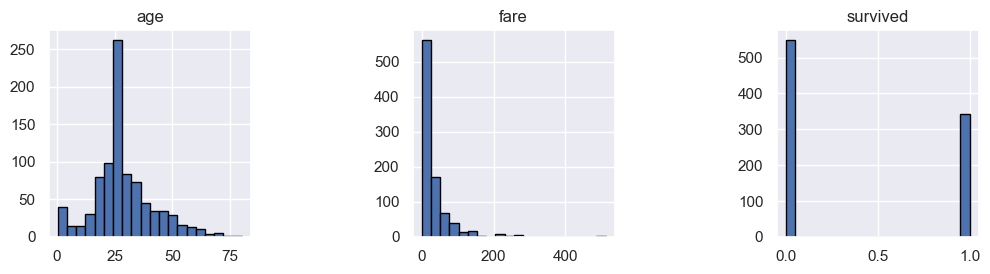

In [189]:
# Distribution of Age, fare and survival
numerical_data = df_titanic[['age', 'fare', 'survived']]
numerical_data.hist(
    bins=20, figsize=(12, 22), edgecolor="black", layout=(5, 3)
)
plt.subplots_adjust(hspace=0.8, wspace=0.8)

<p><b>Age</b>: The age distribution is right-skewed, with more young passengers and fewer older individuals aboard the Titanic.
    
<b>Fare</b>: Most passengers paid lower fares, with a small number paying much higher fares.

<b>Survival</b>: The survival distribution shows more passengers did not survive the disaster than those who did.</p>

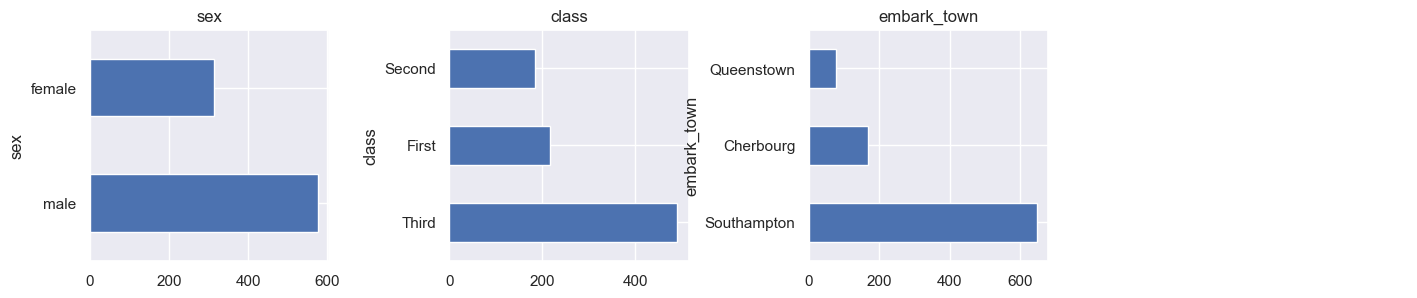

In [203]:
from math import ceil
from itertools import zip_longest

categorical_data = df_titanic[['sex', 'class', 'embark_town']]

n_string_features = categorical_data.shape[1]
nrows, ncols = ceil(n_string_features / 4), 4

fig, axs = plt.subplots(ncols=ncols, nrows=nrows, figsize=(17, 3))

for feature_name, ax in zip_longest(categorical_data, axs.ravel()):
    if feature_name is None:
        # do not show the axis
        ax.axis("off")
        continue

    string_data[feature_name].value_counts().plot.barh(ax=ax)
    ax.set_title(feature_name)

plt.subplots_adjust(hspace=0.8, wspace=0.5)

<p><b>Sex</b>: More men were aboard the Titanic than women.

<b>Class</b>: The majority of passengers traveled in third class, with first-class passengers representing a smaller.

<b>Embark Town</b>: Most passengers boarded at Southampton, with fewer passengers embarking from Cherbourg and Queenstown.</p>

#### 4.2 Analyzing the relationship between fare and class

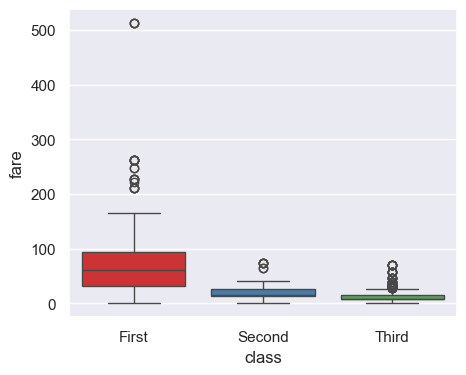

In [213]:
# Set the figure size
plt.figure(figsize=(5, 4))  # Adjust the width and height accordingly

# Create the boxplot with different colors for each class
sns.boxplot(x="class", y="fare", data=df_titanic, hue="class", palette="Set1")

# Display the plot
plt.show()

<p>Fare increases with class, first-class passengers paid the highest, followed by second-class, with third-class paying the least.
Also, by using groupby mean, we see that first-class passengers paid significantly higher fares on average than those in second and third class.</p>

In [217]:
df_titanic.groupby('pclass')['fare'].mean()

pclass
1    84.154687
2    20.662183
3    13.675550
Name: fare, dtype: float64

<p> We can also confirm this relationship using the P-value, which indicates whether the correlation between fare and class is statistically significant. The P-value represents the probability that the observed correlation occurred by chance. Typically, we choose a significance level of 0.05, meaning if the P-value is below 0.05, we are 95% confident that the correlation is meaningful and not due to random variation.

We can obtain this information using "stats" module in the "scipy" library.</p>

In [219]:
from scipy import stats

pearsonCorr, pValue = stats.pearsonr(df_titanic['pclass'], df_titanic['fare'])
print("The Pearson Correlation Coefficient is", pearsonCorr, " with a P-value of P =", pValue)

The Pearson Correlation Coefficient is -0.5494996199439077  with a P-value of P = 1.967386173422602e-71


<p>Since the p-value is < 0.001, the correlation between class and fare is statistically significant, although the linear relationship isn't extremely strong ~0.549.</p>

#### Conclusion

<p>Fare and class are closely related, as fare is a strong indicator of class, with higher fares generally corresponding to higher classes. For the rest of our analysis, we will take the class as an indicator that a passenger paid more for the ticket.</p>

#### 4.3 Analyzing the distribution of gender by class

<Axes: xlabel='sex', ylabel='count'>

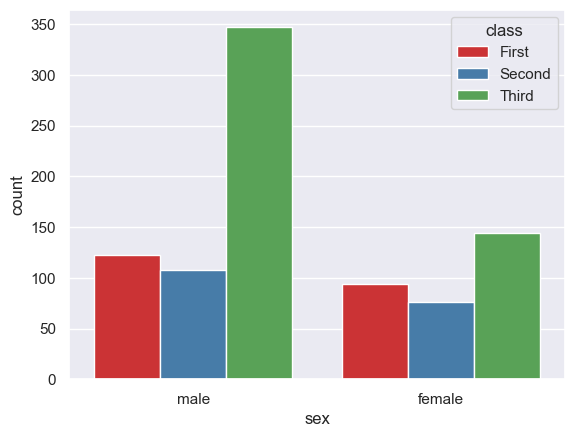

In [212]:
sns.countplot(x='sex', hue='class', data=df_titanic, palette="Set1")

#### Conclusion:

<p>Women were more prevalent in first class, while men dominated third class, with second class showing a more balanced gender distribution.</p>

#### 4.4 Survival rate by class

In [232]:
# grouping results by class
grouped_class = df_titanic[['class', 'survived']].groupby(['class'], as_index=False, observed=True).mean()
grouped_class

,class,survived
0,First,0.629630
1,Second,0.472826
2,Third,0.242363


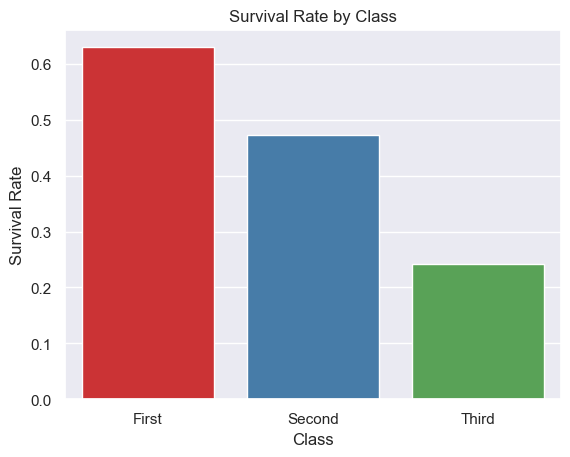

In [244]:
# Survival rates by class
sns.barplot(x='class', y='survived', hue="class", data=grouped_class, palette="Set1")
plt.title('Survival Rate by Class')
plt.ylabel('Survival Rate')
plt.xlabel('Class')
plt.show()

#### Conclusion:

<p>The mean survival rates grouped by class indicate a strong relationship between class and survival, with higher classes (and consequently higher fares) associated with higher survival rates, suggesting that socioeconomic status played a significant role in survival outcomes on the Titanic.</p>

#### 4.5 Survival rate by gender

In [234]:
# grouping results by gender
grouped_gender = df_titanic[['sex', 'survived']].groupby(['sex'], as_index=False, observed=True).mean()
grouped_gender

,sex,survived
0,female,0.742038
1,male,0.188908


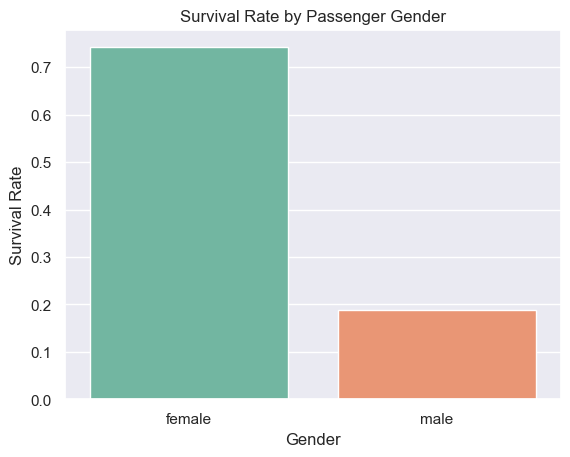

In [251]:
# Survival rates by passenger gender
sns.barplot(x='sex', y='survived', data=grouped_gender, hue='sex', palette = 'Set2')
plt.title('Survival Rate by Passenger Gender')
plt.ylabel('Survival Rate')
plt.xlabel('Gender')
plt.show()

#### Conclusion

<p>The mean survival rates by gender reveal that females had a significantly higher survival rate than males, indicating that gender was a critical factor in survival on the Titanic. However, in the analysis of the distribution of gender by class, we noticed that men were very present in the third class. Hence, the higher proportion of men in third class likely contributed to the lower survival rates among males. We can confirm this hypothesis in the next vizualisation.</p>

#### 4.6 Survival rate by gender and class

In [236]:
# Calculate the survival rate by sex and class
survival_rate = df_titanic[['class', 'sex', 'survived']].groupby(['class', 'sex'], as_index=False, observed=True).mean()
survival_rate

,class,sex,survived
0,First,female,0.968085
1,First,male,0.368852
2,Second,female,0.921053
3,Second,male,0.157407
4,Third,female,0.500000
5,Third,male,0.135447


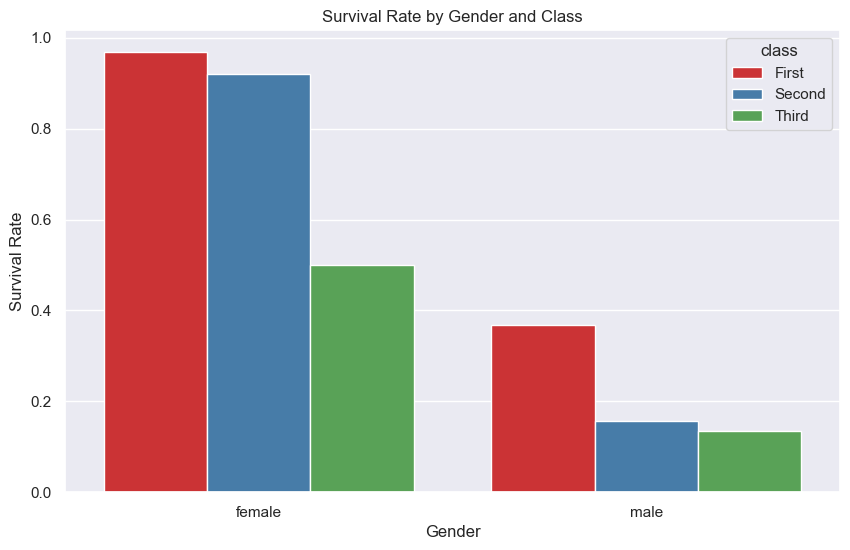

In [237]:
# Create a bar plot
plt.figure(figsize=(10,6))  # Adjust the size of the plot
sns.barplot(x='sex', y='survived', hue='class', data=survival_rate, palette='Set1')

# Add titles and labels
plt.title('Survival Rate by Gender and Class')
plt.ylabel('Survival Rate')
plt.xlabel('Gender')

# Display the plot
plt.show()

#### Conclusion

<p>The plot illustrates that survival rates for women were significantly higher across all classes compared to men, with first-class women having the highest survival rate, followed by second-class women. In contrast, third-class men had the lowest survival rate, emphasizing that gender and class combined strongly influenced survival outcomes.</p>

#### 4.7 Visualizing the distribution of passengers by age and survival

<Axes: xlabel='age', ylabel='Count'>

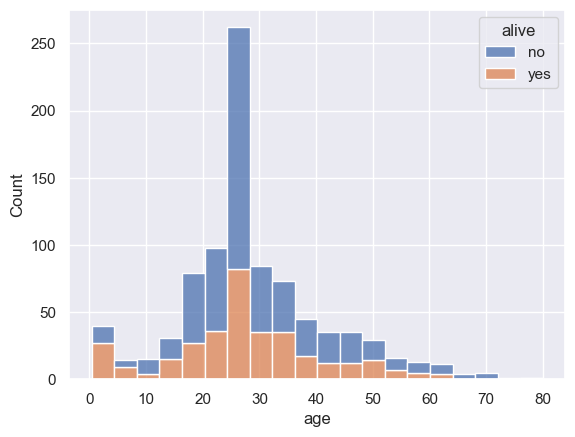

In [259]:
sns.histplot(data=df_titanic, x='age', hue='alive', multiple='stack', bins=20)

<p>We can notice that survivors were evenly distributed across all ages, with two exceptions. We have a spike for the passengers in the mid 20s, and we have a relative high survival rates for the children under 10 years old. Let's see the distribution of the age by gender and class, maybe we can have an explanation for that.</p>

<Axes: xlabel='age', ylabel='Count'>

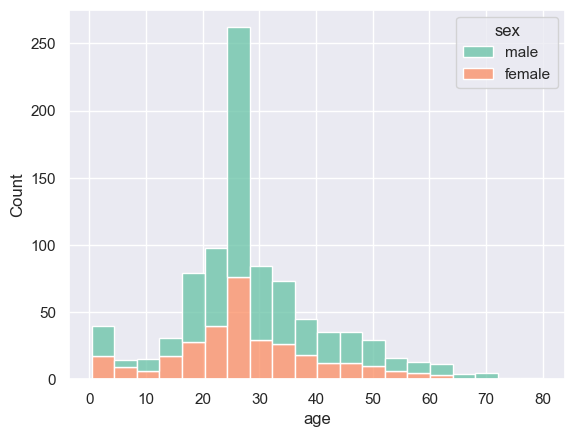

In [269]:
# Distribution of passengers by gender
sns.histplot(data=df_titanic, x='age', hue='sex', multiple='stack', bins=20, palette = 'Set2')

<Axes: xlabel='age', ylabel='Count'>

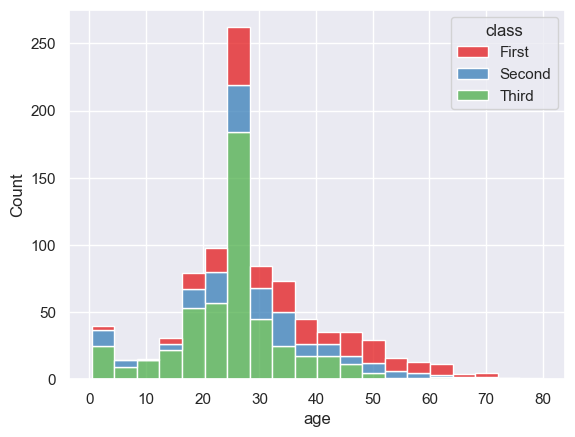

In [270]:
# Distribution of passengers by class
sns.histplot(data=df_titanic, x='age', hue='class', multiple='stack', bins=20, palette = 'Set1')

#### Conclusion

<p>These visualizations reveal that a significant number of passengers in their mid 20s were men traveling in third class, a group that, as noted in our earlier analysis, had the lowest survival rates.
However, it is noteworthy that many young children (under 10) were able to survive, despite being predominantly male and in third class. We can proove We can confirm this hypothesis in the next vizualisation, by engineering a new feature to represent age groups. </p>

#### 4.8 Survival rate by class and age groups

In [272]:
# Add a feature for age groups
bins = [0, 12, 18, 35, 60, 100]  # Age bins
labels = ['Child', 'Teen', 'Young Adult', 'Adult', 'Senior']
df_titanic['age_group'] = pd.cut(df_titanic['age'], bins=bins, labels=labels)

# Calculate the survival rate by age group, sex, and class
survival_rate = df_titanic[['age_group', 'class', 'survived']].groupby(['age_group', 'class'], as_index=False, observed=True).mean()
survival_rate

,age_group,class,survived
0,Child,First,0.750000
1,Child,Second,1.000000
2,Child,Third,0.416667
3,Teen,First,0.916667
4,Teen,Second,0.500000
5,Teen,Third,0.282609
6,Young Adult,First,0.666667
7,Young Adult,Second,0.428571
8,Young Adult,Third,0.239521
9,Adult,First,0.611111


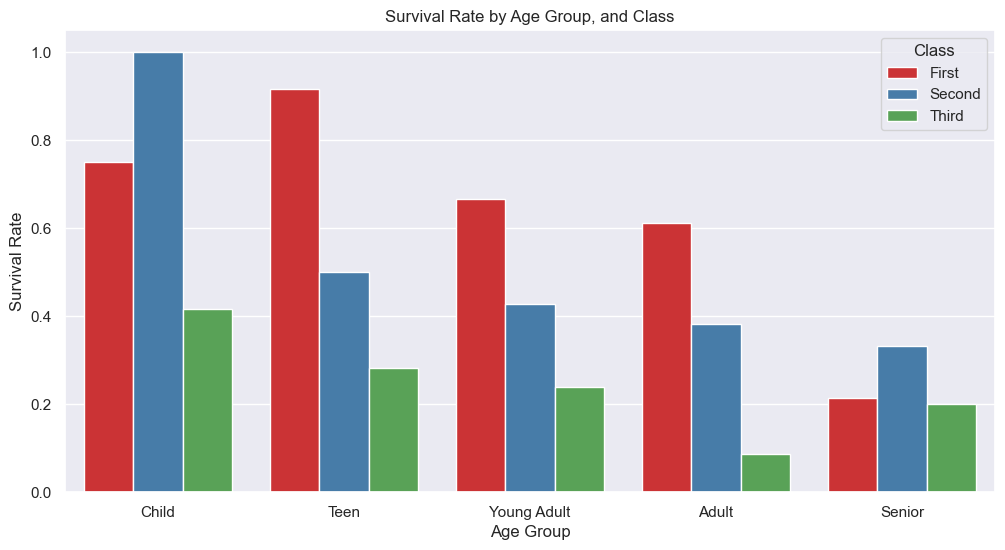

In [252]:
# Create a bar plot
plt.figure(figsize=(12, 6))  # Adjust the size of the plot
sns.barplot(x='age_group', y='survived', hue='class', data=survival_rate, palette='Set1')

# Add titles and labels
plt.title('Survival Rate by Age Group, and Class')
plt.ylabel('Survival Rate')
plt.xlabel('Age Group')

# Set legend title
plt.legend(title='Class')

# Display the plot
plt.show()

#### Conclusion

<p>The bar plot shows that survival rates were relatively highest for the Child age group, regardless of their class. In contrast, the Senior group had the lowest survival rate regardless of the class, emphasizing that the age also impacted the survival chances in these cases.</p>

#### 4.9 Survival rate by gender and age groups

In [271]:
# Calculate the survival rate by age group, sex, and class
survival_rate = df_titanic[['age_group', 'sex', 'survived']].groupby(['age_group', 'sex'], as_index=False, observed=True).mean()
survival_rate

,age_group,sex,survived
0,Child,female,0.593750
1,Child,male,0.567568
2,Teen,female,0.750000
3,Teen,male,0.088235
4,Young Adult,female,0.751445
5,Young Adult,male,0.162983
6,Adult,female,0.771429
7,Adult,male,0.192000
8,Senior,female,1.000000
9,Senior,male,0.105263


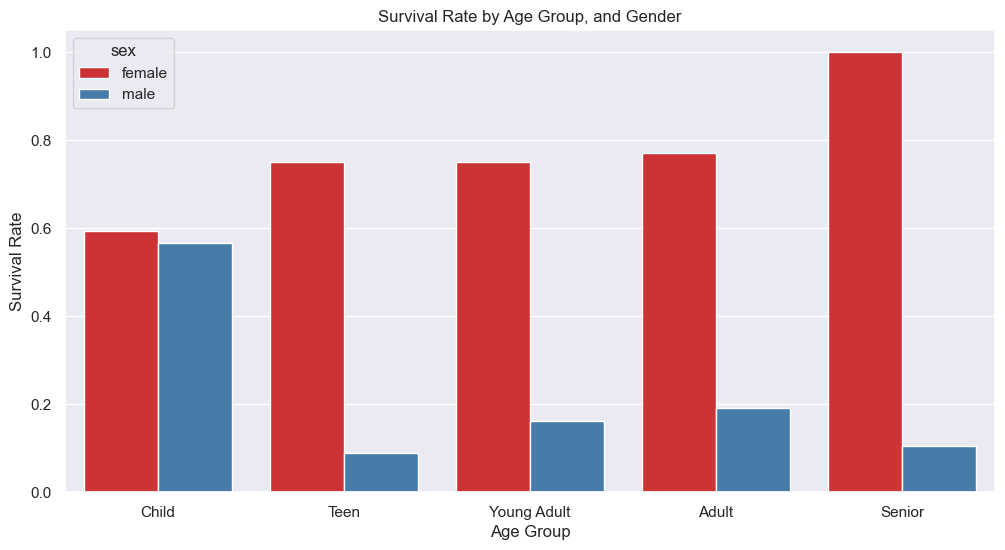

In [263]:
# Create a bar plot
plt.figure(figsize=(12, 6))  # Adjust the size of the plot
sns.barplot(x='age_group', y='survived', hue='sex', data=survival_rate, palette='Set1')

# Add titles and labels
plt.title('Survival Rate by Age Group, and Gender')
plt.ylabel('Survival Rate')
plt.xlabel('Age Group')

# Set legend title
plt.legend(title='sex')

# Display the plot
plt.show()

#### Conclusion

<p>The bar plot indicates that survival rates for the child age group are not influenced by gender; however, for the other age groups, the data reinforces previous findings that women were more likely to survive.</p>